In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

In [ ]:
SIZE = 128 #img size

# **Gaussian**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("Example-path*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
folders = ['startpage',
'winwebsec',
'zbot',
'obfuscator',
'vobfus',
'onlinegames',
'rbot',
'zeroaccess',
'renos',
'vundo',
'cycbot',
'hotbar',
'agent',
'fakerean',
'delfinject',
'bho',
'ceeinject',
'alureon',
'adload',
'lolyda']

In [ ]:
print(len(test_images))
print(len(test_labels))

5292
5292


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = load_model('/content/drive/MyDrive/Malware/malhub_old_proposed_model_1.h5')

In [ ]:
y_pred = model.predict(x_test)


166/166 [==============================] - 16s 41ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.9928193499622071
Macro-Averaged F1 Score: 0.9923987415071736
Accuracy: 0.9928193499622071
Micro-Averaged Precision: 0.9928193499622071
Macro-Averaged Precision: 0.9935177814967308
Micro-Averaged Recall: 0.9928193499622071
Macro-Averaged Recall: 0.9915096743144968


In [ ]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

166/166 [==============================] - 15s 38ms/step


[[209   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  1 141   0   0   0  15   0   0   0   0   3   2   0   0   3   0   0   0
    1   3]
 [  0   0 256   0   0   0   0   0   0   5   2   3   0   0   0   0   0   0
    0   0]
 [  0   0   1 230   0   0   0   0   0   0   0   3   2   0   0   0   0   0
    0   0]
 [  0   0   6   2  87   0   0   1   1   1   0  17  17   0   1  44   0   2
    0   0]
 [  0   0   0   0   0 201   0   0   0   5   0   0   0   0   0   0   0   0
    0   0]
 [  4   0   0   0   0   0 192   0   0   0   1   4   0   0   0  26   0   0
    0   3]
 [  0   0   0   0   0   0   0 213   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   4   0  26 174   7   2   0   3   4  16  62   0   0
    0   1]
 [  0   0   0   0   0   0   0   0   0 183   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   1   0   0 288   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 259   0   0   0   0

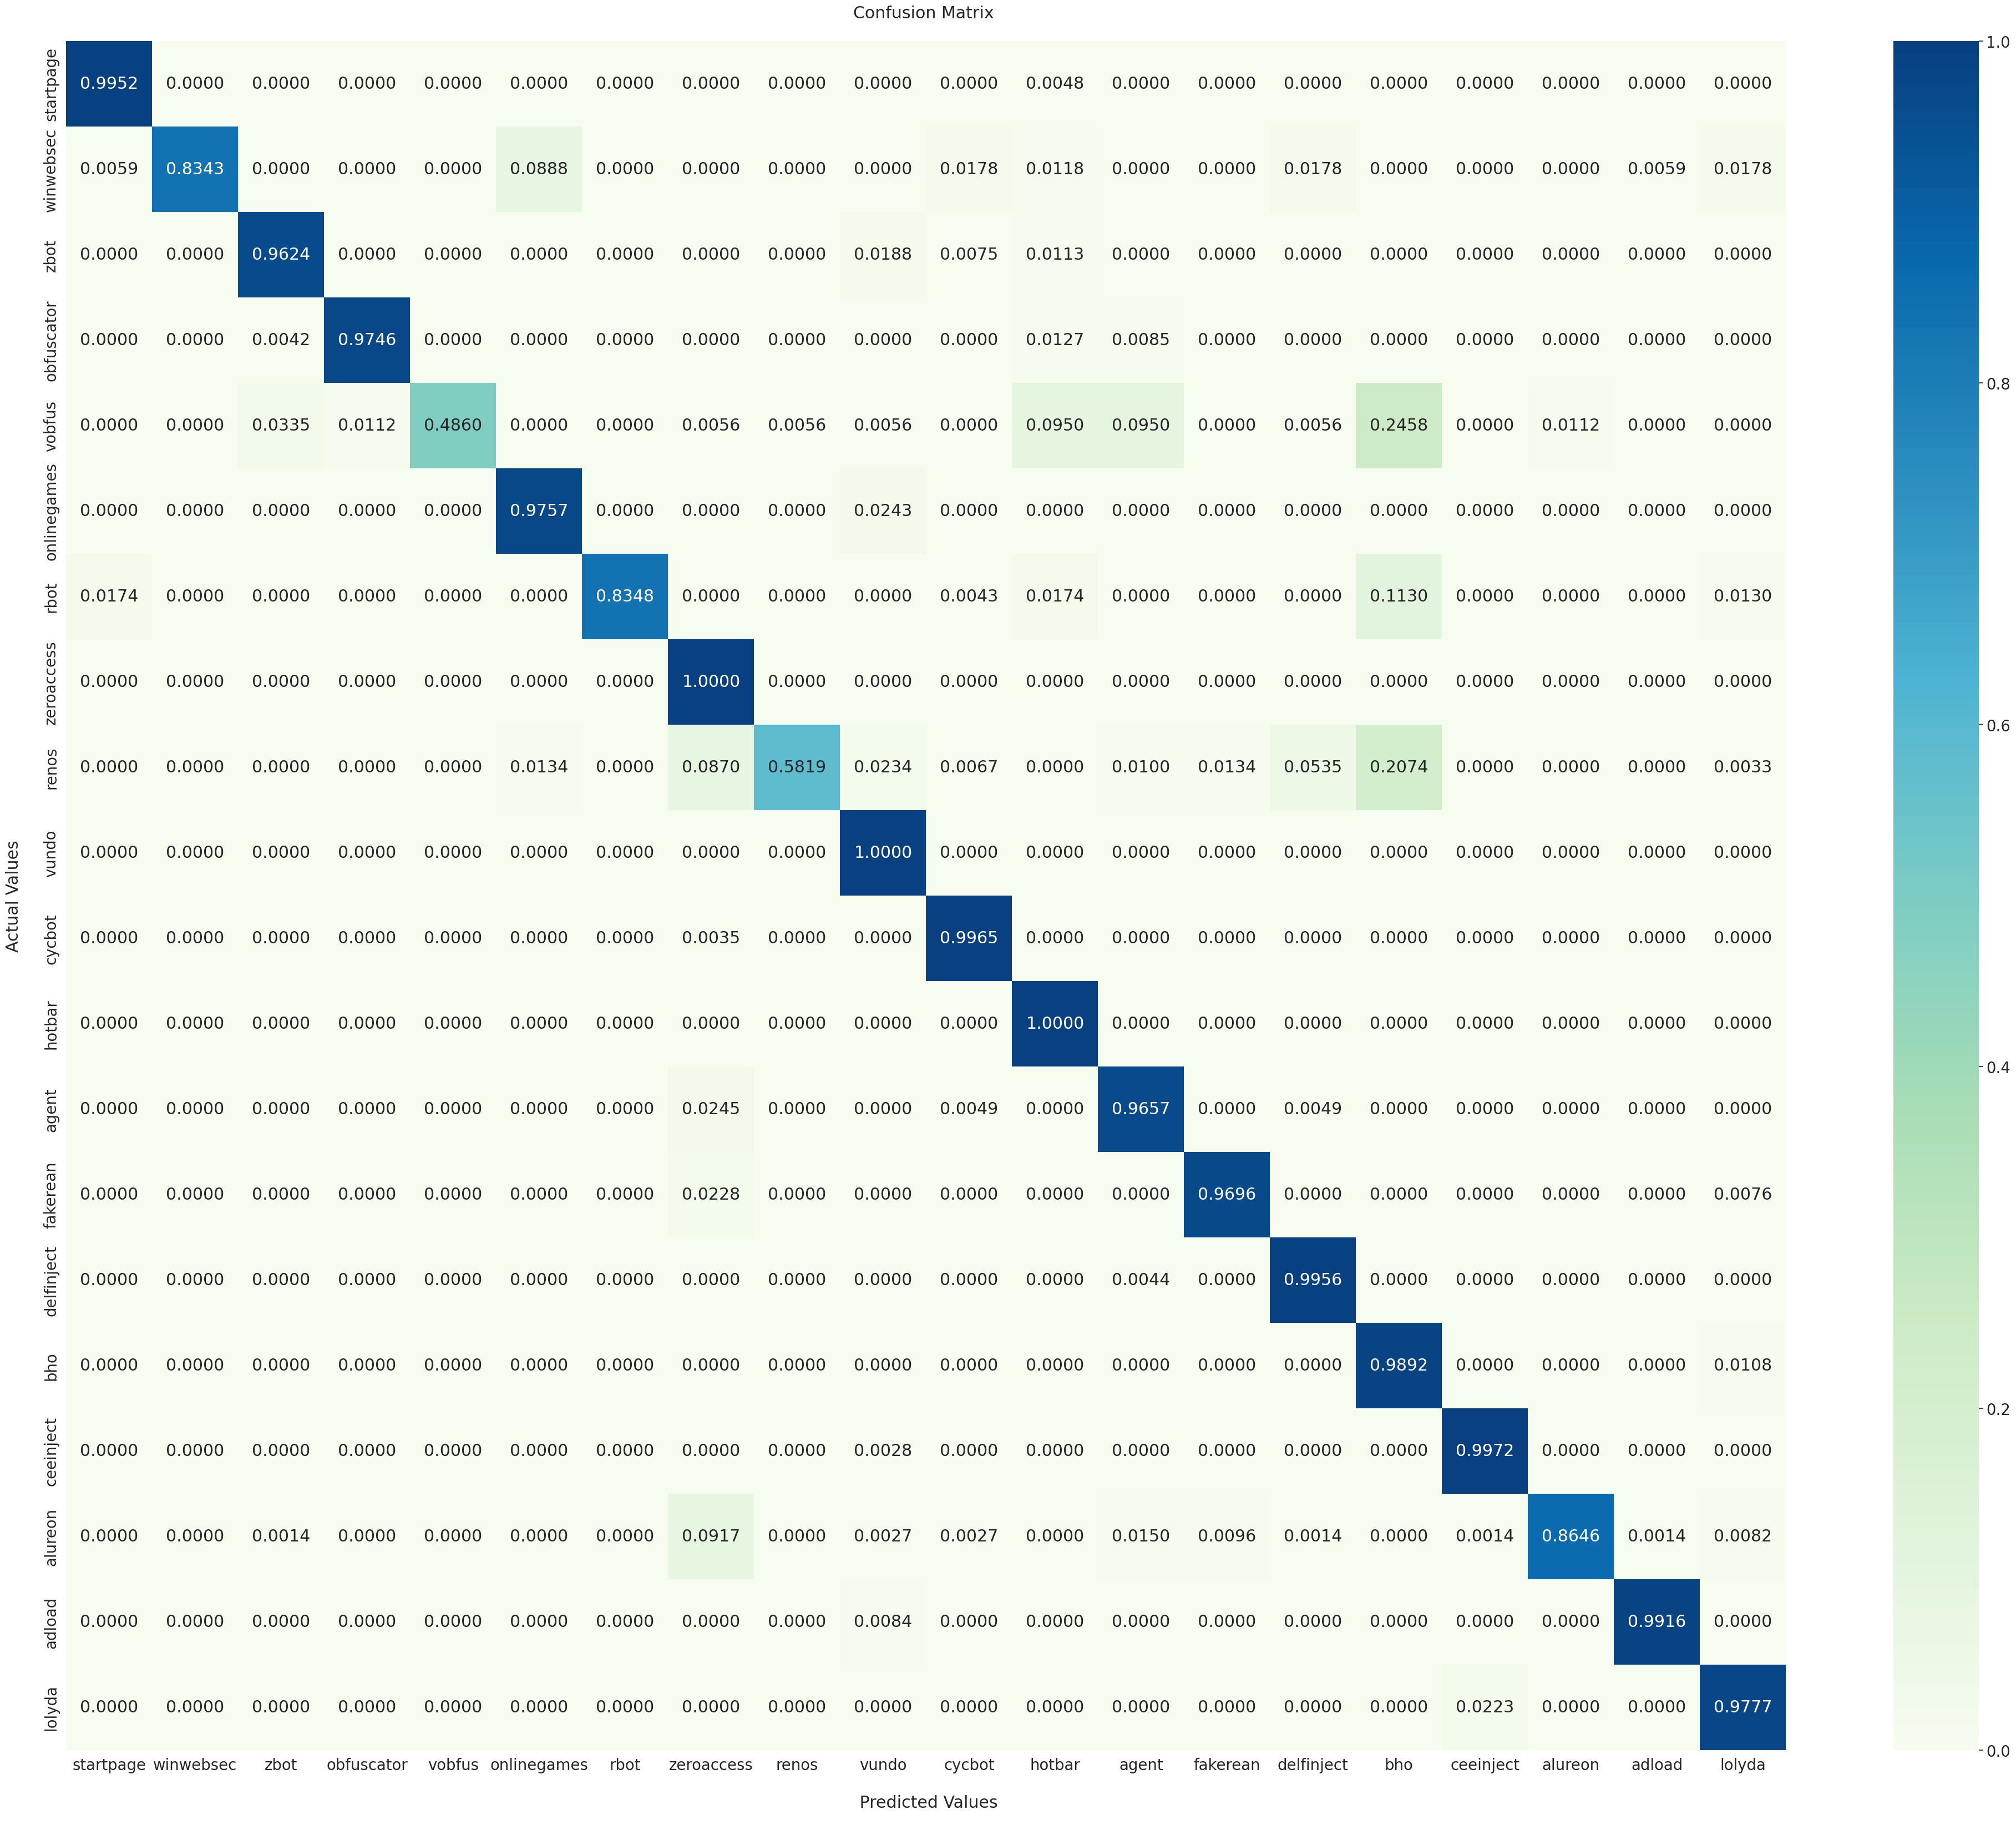

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
cm = confusion_matrix(test_labels, prediction_NN ,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()

# **Local** **Variable**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/localvar_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_pred = model.predict(x_test)


331/331 [==============================] - 12s 36ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.4794028722600151
Macro-Averaged F1 Score: 0.5827703310038286
Accuracy: 0.4794028722600151
Micro-Averaged Precision: 0.4794028722600151
Macro-Averaged Precision: 0.8776064638938184
Micro-Averaged Recall: 0.4794028722600151
Macro-Averaged Recall: 0.48667618293792503


# **Poisson**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/poisson_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
print(len(test_images))
print(len(test_labels))

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_pred = model.predict(x_test)


263/263 [==============================] - 10s 37ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.25460815792603164
Macro-Averaged F1 Score: 0.24137670561333358
Accuracy: 0.25460815792603164
Micro-Averaged Precision: 0.25460815792603164
Macro-Averaged Precision: 0.4640724899425311
Micro-Averaged Recall: 0.25460815792603164
Macro-Averaged Recall: 0.23578043314935018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Salt**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/salt_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
print(len(test_images))
print(len(test_labels))

5292
5292


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_pred = model.predict(x_test)


166/166 [==============================] - 6s 35ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.25460815792603164
Macro-Averaged F1 Score: 0.24137670561333358
Accuracy: 0.25460815792603164
Micro-Averaged Precision: 0.25460815792603164
Macro-Averaged Precision: 0.4640724899425311
Micro-Averaged Recall: 0.25460815792603164
Macro-Averaged Recall: 0.23578043314935018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Pepper**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/pepper_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
print(len(test_images))
print(len(test_labels))

5292
5292


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_pred = model.predict(x_test)


166/166 [==============================] - 6s 34ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.25460815792603164
Macro-Averaged F1 Score: 0.24137670561333358
Accuracy: 0.25460815792603164
Micro-Averaged Precision: 0.25460815792603164
Macro-Averaged Precision: 0.4640724899425311
Micro-Averaged Recall: 0.25460815792603164
Macro-Averaged Recall: 0.23578043314935018


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **S&P**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/s&p_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
print(len(test_images))
print(len(test_labels))

2408
2408


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_pred = model.predict(x_test)

76/76 [==============================] - 3s 41ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.12001661129568106
Macro-Averaged F1 Score: 0.0267890248424175
Accuracy: 0.12001661129568106
Micro-Averaged Precision: 0.12001661129568106
Macro-Averaged Precision: 0.015002076411960132
Micro-Averaged Recall: 0.12001661129568106
Macro-Averaged Recall: 0.125


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Speckle**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/speckle_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
print(len(test_images))
print(len(test_labels))

0
0


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.12001661129568106
Macro-Averaged F1 Score: 0.0267890248424175
Accuracy: 0.12001661129568106
Micro-Averaged Precision: 0.12001661129568106
Macro-Averaged Precision: 0.015002076411960132
Micro-Averaged Recall: 0.12001661129568106
Macro-Averaged Recall: 0.125


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
